# The filter2D() function
1. Τhe __```filter2D()```__ function convolves an image with the kernel to change the image features.
1. It is used to change the pixel intensity value of an image based on the surrounding pixel intensity values.
1. This method can enhance or remove certain features of an image and to create a new image.
1. The syntax is __```filtered_image=cv2.filter2D(src, ddepth, kernel)```__.
1. Its __input arguments__ are the following:
    1. __`src`__: The __source image__ on which to apply the filter. It is a __matrix__ that represents the __image__ in __pixel intensity__ values.
    1. __`ddepth`__: It is the __desirable depth__ of the __destination image__. The $-1$ value represents that the __resulting image__ will have the __same depth__ as the __source image__.
    1. __`kernel`__: It is the __filter matrix__ applied on the image.

The following code is used for blurring an image:
```python
# Import the libraries
import cv2
import numpy as np

# Insert the image
src_image = cv2.imread("test1.jpg")
# Define a 3 x 3 kernel
kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
# How to blur an image
resulting_image=cv2.filter2D(src_image,-1,kernel)

cv2.imshow("Original Image", src_image)
cv2.imshow("Blurred Image", resulting_image)
cv2.imwrite("Blurred Image.jpg",resulting_image)
cv2.waitKey()
cv2.destroyAllWindows()
```

# The cv2.blur() function
It is used to __blur__ an image using the __normalized box filter__. The function __smooths__ an image using the kernel which is represented as: 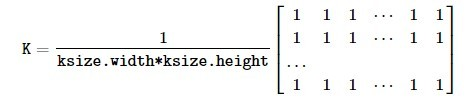

1. Its syntax is __`blurred_image=cv2.blur(src,ksize)`__.
1. The __src__ is the __input image__.
1. The __ksize__ is the __kernel size__ used for __blurring__. It should be a __tuple__ representing the __width__ and __height__ of the kernel.
1. For example a $5 x 5$ kernel is given as __`(5,5)`__.
1. The __`blurred_image`__ is the __image returned__ as the result of the function.

The following code is used to perform blurring:
```python
import cv2
import numpy as np

# Read an image from file
image = cv2.imread('example.jpg')

# Define the size of the kernel for blurring
ksize = (5, 5)

# Apply blur
blurred_image = cv2.blur(image, ksize)

# Display the original and blurred images
cv2.imshow('Original Image', image)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

```

The initial image is: 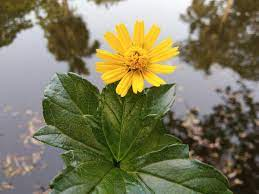

The blurred image is: 

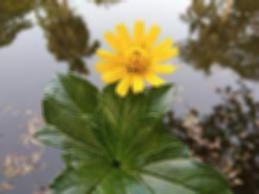

# Gaussian Filtering
1. Instead of a __box filter__ consisting of __equal__ filter coefficients, a __Gaussian kernel__ is used.
1. It is done through the function __`cv2.GaussianBlur()`__.
1. The __Gaussian kernel__ is a filter that __reduces__ the __high-frequency__ components.
1. Its syntax is __`cv2.GaussianBlur(src,ksize,sigma)`__.
1. The __`src`__ is the __input image__.
1. The __`ksize`__ is the __kernel size__ defined by the __width__ and __height__ of the kernel. Both values should be __positive__ and __odd__.
1. We should also __specify__ the __standard deviation__ in the __'X'__ and __'Y'__ directions.
1. Usually only the one in the __X__ dimension is given and the other is taken as the same.
1. If __both__ are given as __zeros__, they are __calculated__ from the __kernel size__.
1. __Gaussian filtering__ is highly effective in __removing__ Gaussian noise from the image.

# Exercise 1
1. Read the image 'test1.jpg' through the OpenCV and transform it from BGR to RGB.
2. Then define various kernel sizes (e.g. 3, 5, 9, 11,15).
3. For each kernel size perform both average smoothing and Gaussian filtering.
4. Create a subplot (2 X 5 grid) to visualize the filtering results.
5. What did you observe as we increase the kernel size?
6. Which methodology is better in terms of features preservation?

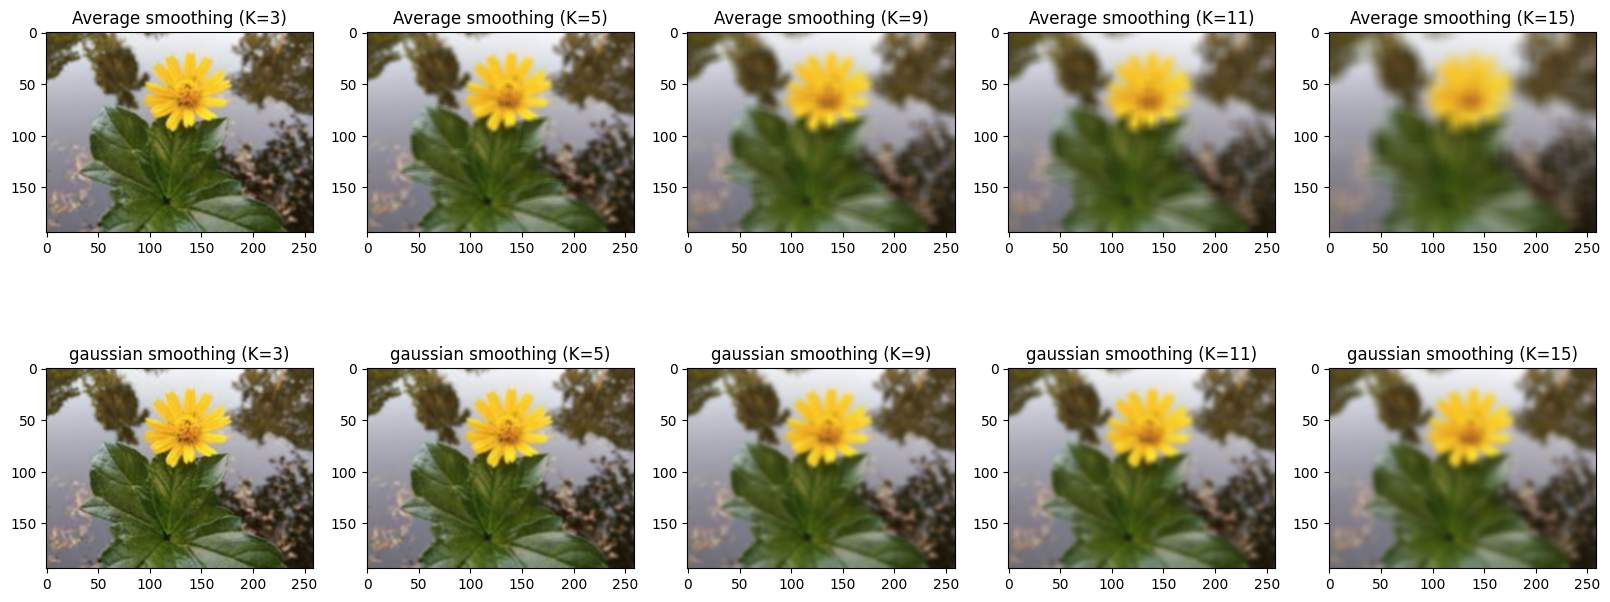

In [17]:
# Place your code here
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src = cv.imread('test1.jpg')

src_rgb = cv.cvtColor(src,cv.COLOR_BGR2RGB)

ksize = [3,5,9,11,15]

fig, axs = plt.subplots(2, len(ksize), figsize = (20,8))
#plt.title("Average vs gaussian filtering", fontsize=16)

for i,k in enumerate(ksize):
    avg_smooth = cv.blur(src_rgb, (k,k))
    gauss_smooth = cv.GaussianBlur(src_rgb, (k,k),0)

    axs[0,i].imshow(avg_smooth)
    axs[0,i].set_title(f"Average smoothing (K={k})")
    axs[1,i].imshow(gauss_smooth)
    axs[1,i].set_title(f"gaussian smoothing (K={k})")



# The cv2.Canny() function
1. It is an OpenCV function used for __edge detection__.
1. Its syntax is:
__`cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None)`__
1. __image__: Input image (grayscale)
1. __threshold1__: First threshold for the hysteresis procedure
1. __threshold2__: Second threshold for the hysteresis procedure
1. __edges__: Optional output edge map. It should be the same as the input image.
1. __apertureSize__: Aperture size for the __Sobel__ operator (__optional__, default is 3).
1. __L2gradient__: A flag indicating whether to use the __L2 norm (True)__ or the __L1 norm (False)__ for gradient calculation __(optional, default is False)__.

Here is a brief __explanation__ of the parameters:
1. __threshold1__ and __threshold2__: These parameters control the thresholds for __edge detection__. The algorithm first detects __strong edges__ and then includes __weaker edges__ that are connected to __strong edges__. The __threshold1__ is the __lower__ threshold and __threshold2__ is the __upper__ threshold.
1. __apertureSize__: This parameter specifies the __size__ of the __Sobel kernel__ used for __gradient calculation__. It is an __optional__ parameter and the __default value__ is 3.
1. __L2gradient__: This is a __boolean flag__ that indicates whether to use the __L2 norm (True)__ or the __L1 norm (False)__ for __gradient calculation__. The __default__ value is __False__, meaning that the __L1 norm__ is used.

Below is an example of using the Canny Edge Detection Algorithm in our test image:
```python
import cv2

# Read an image from file
image = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 50, 150)

# Display the result
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('CannyEdgeDetectionTest.jpg',edges)

```

The result of the code is the following:
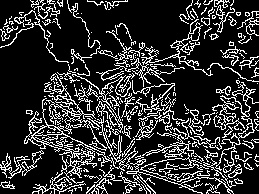

1. To conclude, the algorithm __first identifies__ pixels with gradient magnitudes __higher than `threshold2`__ as __strong edges__.
1. Then, pixels with gradient magnitudes __between `threshold1` and `threshold2`__ are considered __weak edges__ if they are connected to __strong edges__.
1. Pixels with gradient magnitudes __below `threshold1`__ are described as non-edges.

# Exercise 2

1. Load the 'LENNA.jpg' as a grayscale image.
1. Develop a function which receives as input arguments the 1) image, 2) threshold_1, 3) threshold_2 and 4) a plot_position on the grid for visualization. This function will perform edge detection and visualize the result on the defined plot position.
1. Outside the function define the plotting grid setup and apply Canny edge detection with various threshold parameters.

In [ ]:
# Place your code here
src = cv.imread('LENNA.jpg',cv.IMREAD_GRAYSCALE)

def edge_detection(image,threshold_1,threshold_2,plot_position):
    edges = cv.Canny(image,threshold_1,threshold_2)

    plt.subplot()


# How to check if the image loaded successfully
1. The line of code __`if original_image is not None:`__ checks whether the variable __`original_image`__ contains a __`None`__ value.
1. The __`None`__ is a special constant that represents the __absence__ of a value or a null-value.
1. In this specific context __`cv2.imread(image_path)`__ is a function call that reads an image from the file specified by __`image_path`__ using the OpenCV library.
1. If the image is __successfully read__, the function returns a NumPy array representing the image, and __`original_image`__ is assigned to this array.
1. If the __image cannot be read__ (e.g. the file does not exist or is not a valid image file), then __`cv2.imread()`__ returns __`None`__.
1. So, the __`if original_image is not None:`__ statement is a way to __check whether the image was successfully read__ before proceeding with further processing.
1. If the image is __`None`__ (not read successfully), the code inside the __`if`__ block __won't be executed, avoiding potential errors__ that might occur if you try to process an image that was not loaded correctly.

The following is a __good programming habit__ being demonstrated in the following:
```python
# Example usage
image_path = 'test1.jpg'
original_image = cv2.imread(image_path)

if original_image is not None:
    edge_image = roberts_edge_detection(original_image)

    cv2.imshow('Original Image', original_image)
    cv2.imshow('Roberts Edge Detection', edge_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"Error: Unable to read the image from {image_path}")

```

# Exercise 3
Code a function that will do the following:
1. Transform an image from BGR to grayscale
1. Define the Roberts kernels as NumPy arrays.
1. Convolve the image with the Roberts kernels.
1. Combine th results to get the final edge_detected image
1. Normalize the value to the range 0-255.
1. return the result

Then, define the code to visualize in two different images both the original (tiger.jpg) image and the output of the edge detection algorithm.

In [2]:
# Place your code here